<a href="https://colab.research.google.com/github/arpitawad04/League_Of_Legends_Match_winner_prediction/blob/main/A21005_Arpit_Awad_BDSN_Assignment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective:
The purpose of the project is to analyse a dataset and predict the winner of the match before a match has been started on the basis of players historical data. The statistical algorithm ‘Logistic Regression’ would also be used to train the dataset and predict an assigned binary target variable. The data of League of Legends pre match 2021’ is used for analysis. League of Legends, commonly referred to as League, is a 2009 multiplayer online battle arena video game developed and published by Riot Games. Inspired by Defence of the Ancients, a custom map for Warcraft III, Riot's founders sought to develop a stand-alone game in the same genre. A proper analysis of the data will help in bringing out meaningful insights.

Required packages have been imported.

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#Install Spark
apt is a command-line utility for installing, updating, removing, and otherwise managing deb packages on Ubuntu, Debian, and related Linux distributions.

In [8]:
!apt update > /dev/null
!apt install openjdk-8-jdk-headless -qq > /dev/null

In [9]:
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"


     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 30.8 MB/s 


In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

#Downloading dataset from link

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tTUiFkogJoWCVVkEOJ6mufQRf-5KVhVE' -O LOL_transformed_dataset_extended_withadded_attributes.csv


--2022-03-05 05:43:14--  https://docs.google.com/uc?export=download&id=1tTUiFkogJoWCVVkEOJ6mufQRf-5KVhVE
Resolving docs.google.com (docs.google.com)... 172.217.203.102, 172.217.203.113, 172.217.203.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8u8mjjrofktbj3tq526f20b2l9a6o5ef/1646458950000/06650428154504132176/*/1tTUiFkogJoWCVVkEOJ6mufQRf-5KVhVE?e=download [following]
--2022-03-05 05:43:16--  https://doc-0s-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8u8mjjrofktbj3tq526f20b2l9a6o5ef/1646458950000/06650428154504132176/*/1tTUiFkogJoWCVVkEOJ6mufQRf-5KVhVE?e=download
Resolving doc-0s-8o-docs.googleusercontent.com (doc-0s-8o-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0s-8o-docs.googleusercontent.com (doc-0s-8o-docs

#Load Dataset 

**Data Collection:**
Dataset used is taken from "https://oracleselixir.com/"  where data about all the league of legends higher ranked games are stored.
This dataset contains record of every game for a player in columns format so this dataset I have used for our recommendation engine for champions in my some other work . But for using it as a pre-game match prediction dataset we had to convert it into row format where each row contains data of a game played along with details of each player from both teams, their champion, there kills, deaths, assists etc.


**Dataset For Pre-match Game Prediction:**\
This Dataset contains information about 7425 professional games. Each row is a unique game and having lots of features .\
Column “Result” is the target, and 1 means blue win while 0 means red win.

In [11]:
df = (spark
  .read                                              
  .option("inferSchema","true")                 
  .option("header","true")                           
  .csv("/content/LOL_transformed_dataset_extended_withadded_attributes.csv"))

#Features:
Overall, we have 128 features.
The various features of the dataset are explained below:

•	Game: Game ID\
•	Team ID:Name of the Team.\
•	bluetop_playerid:ID generated by game for a player in blue team at top position\
•	Bluetop_playername:Name of the player in blue team at top position\
•	bluetop_champion: Name of the champion picked by the player in blue team at top position.\
•	bluetop_Game_played: Number of games played with the champion picked by the player in blue team at top position.\
•	bluetop_champ_win_rate: Win rate percentage of the player with a champion picked in blue team at top position.\
•	bluetop_KDA: The Kill Death Assist (KDA) percentage of the player with a champion picked etc.\
•	bluetop_dmg_to_cham: Amount of damage to opposite team champions of the player with a champion etc.\
•	bluetop_goldearned: Amount of gold earned by blue top player\
•	bluetop_monsterkillsownjungle: The no. of monster kills in own jungle by blue top player\
•	bluetop_monsterkillsenemyjungle: The no. of monster kills in enemy jungle\
•	bluetop_goldat10: Amount of gold earned after reaching level 10 by blue top player.\

The above-mentioned features have the same meaning for blue (jng, mid, bot, sup) and 
Red (top, jng, mid, bot, sup)

•	Red_team_kills:  No. of kills by red team\
•	Red_team_deaths: No. of deaths by red team\
•	blue_ban1: Name of champion banned by blue team in first priority\
•	blue_ban2: Name of champion banned by blue team in second priority \
•	blue_ban3: Name of champion banned by blue team in third priority \
•	blue_ban4: Name of champion banned by blue team in fourth priority \
•	blue_ban5: Name of champion banned by blue team in fifth priority\
•	red_ban1:  Name of champion banned by red team in first priority\
•	red_ban2:  Name of champion banned by red team in second priority\
•	red_ban3:  Name of champion banned by red team in third priority \
•	red_ban4:  Name of champion banned by red team in fourth priority\
•	red_ban5:  Name of champion banned by red team in fifth priority\


In [12]:
df.show()

+--------------------+--------------------+--------------------+-------------------+----------------+-------------------+----------------------+-----------+-------------------+------------------+-----------------------------+-------------------------------+----------------+--------------------+------------------+----------------+-------------------+----------------------+-----------+-------------------+------------------+-----------------------------+-------------------------------+----------------+--------------------+------------------+----------------+-------------------+----------------------+-----------+-------------------+------------------+-----------------------------+-------------------------------+----------------+--------------------+------------------+----------------+-------------------+----------------------+-----------+-------------------+------------------+-----------------------------+-------------------------------+----------------+--------------------+---------------

Lets look at schema's

In [ ]:
df.printSchema()

root
 |-- Gameid: string (nullable = true)
 |-- Blue_Team_id: string (nullable = true)
 |-- bluetop_playerid: string (nullable = true)
 |-- bluetop_player_name: string (nullable = true)
 |-- bluetop_champion: string (nullable = true)
 |-- bluetop_Game_played: integer (nullable = true)
 |-- bluetop_champ_win_rate: double (nullable = true)
 |-- bluetop_KDA: double (nullable = true)
 |-- bluetop_dmg_to_cham: integer (nullable = true)
 |-- bluetop_goldearned: integer (nullable = true)
 |-- bluetop_monsterkillsownjungle: integer (nullable = true)
 |-- bluetop_monsterkillsenemyjungle: integer (nullable = true)
 |-- bluetop_goldat10: integer (nullable = true)
 |-- bluejng_playerid: string (nullable = true)
 |-- bluejng_playername: string (nullable = true)
 |-- bluejng_champion: string (nullable = true)
 |-- bluejng_Game_played: integer (nullable = true)
 |-- bluejng_champ_win_rate: double (nullable = true)
 |-- bluejng_KDA: double (nullable = true)
 |-- bluejng_dmg_to_cham: integer (nullable 

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [267]:
#Import col,avg from pyspark
from pyspark.sql.functions import col,avg


Count how many number of records are there.

In [ ]:
df.count()

7425

#Check the missings:


In [ ]:
# where
df.where(col("bluetop_playerid").isNull()).count()
# filter
df.filter(col("bluetop_playerid").isNull()).count()

0

*These two are the same. According to spark documentation, “where” is an alias of “filter”.*

#Exploratory Data Analysis

In [ ]:
df.describe(["bluetop_Game_played"]).show()


+-------+-------------------+
|summary|bluetop_Game_played|
+-------+-------------------+
|  count|               7425|
|   mean| 3.0894276094276094|
| stddev|  2.484884803671767|
|    min|                  1|
|    max|                 17|
+-------+-------------------+



In [ ]:
df.select('bluetop_Game_played').describe().show()


+-------+-------------------+
|summary|bluetop_Game_played|
+-------+-------------------+
|  count|               7425|
|   mean| 3.0894276094276094|
| stddev|  2.484884803671767|
|    min|                  1|
|    max|                 17|
+-------+-------------------+



In [ ]:
#Get first 10 unique values in "bluetop_champion" columns
bluetop_champ_unique=df.select('bluetop_champion').distinct().rdd.map(lambda r: r[0]).collect()
bluetop_champ_unique[:10]

['Gangplank',
 'Kalista',
 'Poppy',
 'Pantheon',
 'Urgot',
 'Lucian',
 'Azir',
 'Aurelion Sol',
 'Camille',
 'Jayce']

In [ ]:
#Get first 10 unique values in "bluemid_champion" columns
bluemid_champ_unique=df.select('bluemid_champion').distinct().rdd.map(lambda r: r[0]).collect()
bluemid_champ_unique[:10]

['Kalista',
 'Gangplank',
 'Ahri',
 'Pantheon',
 'Poppy',
 'Katarina',
 'Lucian',
 'Azir',
 'Aurelion Sol',
 'Camille']

In [ ]:
#Get first 10 unique values in "bluejng_champion" columns
bluejng_champ_unique=df.select('bluejng_champion').distinct().rdd.map(lambda r: r[0]).collect()
bluejng_champ_unique[:10]

['Pantheon',
 'Poppy',
 'Elise',
 'Vi',
 'Jayce',
 'Xin Zhao',
 'Karthus',
 'Olaf',
 "Cho'Gath",
 "Kha'Zix"]

In [ ]:
#Get first 10 unique values in "blue_ban1" columns
blue_ban1_champ_unique=df.select('blue_ban1').distinct().rdd.map(lambda r: r[0]).collect()
blue_ban1_champ_unique[:10]

['Gangplank',
 'Kalista',
 'Rell',
 'Bard',
 'Ahri',
 'Pantheon',
 'Poppy',
 'Katarina',
 'Elise',
 'Lucian']

In [48]:
#Get first 10 unique values in "red_ban1" columns
red_ban1_champ_unique=df.select('red_ban1').distinct().rdd.map(lambda r: r[0]).collect()
red_ban1_champ_unique[:10]

['Gangplank',
 'Kalista',
 'Rell',
 'Bard',
 'Ahri',
 'Pantheon',
 'Poppy',
 'Katarina',
 'Elise',
 'Lucian']

Groupby a specific player and see which champions he picked and how many games he played.

In [59]:
x=df.filter(df['bluetop_player_name']=='Khan')
x.select(['bluetop_player_name','bluetop_champion','bluetop_Game_played']).show()

+-------------------+----------------+-------------------+
|bluetop_player_name|bluetop_champion|bluetop_Game_played|
+-------------------+----------------+-------------------+
|               Khan|     Mordekaiser|                  1|
|               Khan|        Volibear|                  1|
|               Khan|            Gnar|                 11|
|               Khan|            Gnar|                 11|
|               Khan|            Gnar|                 11|
|               Khan|        Renekton|                  3|
|               Khan|            Gnar|                 11|
|               Khan|            Ornn|                  5|
|               Khan|           Quinn|                  1|
|               Khan|            Sion|                 11|
|               Khan|            Ornn|                  5|
|               Khan|            Ornn|                  5|
|               Khan|            Sion|                 11|
|               Khan|            Sion|                 1

Groupby 'bluetop_player_name" and find total number of games played by them.

In [66]:
df.groupBy("bluetop_player_name").sum("redtop_Game_played").show(truncate=False)


+-------------------+-----------------------+
|bluetop_player_name|sum(redtop_Game_played)|
+-------------------+-----------------------+
|Leaky              |87                     |
|Roach              |44                     |
|Fiv                |33                     |
|Kubu               |18                     |
|Aodi               |12                     |
|NPer               |1                      |
|Rich               |138                    |
|Phoenix            |2                      |
|Rifty              |11                     |
|Bong               |40                     |
|Cozy               |116                    |
|Chasy              |22                     |
|SH4DOW             |5                      |
|Gabbo              |33                     |
|Oncan              |45                     |
|cc                 |15                     |
|BakaPrase          |1                      |
|BioPanther         |69                     |
|SkyBart            |8            

Groupby "bluejng_playername" and find number of games won by him and arranged in ascending order of player name.

In [90]:
df.groupBy("bluejng_playername").sum("Results").sort(col("bluejng_playername"),ascending=True).show()

+------------------+------------+
|bluejng_playername|sum(Results)|
+------------------+------------+
|               113|           7|
|             1Haru|           3|
|            361efe|           2|
|               909|           0|
|              A266|           0|
|           AGENTAS|           2|
|          AHaHaCiK|           9|
|             Accez|           7|
|          Adricesa|           3|
|              Adry|           4|
|             Aegis|          12|
|         Aesthetic|          13|
|         Agonistic|           8|
|  Agony and Misery|           1|
|               Aix|           2|
|          Akaadian|          14|
|           Akabane|           8|
|            Akalos|           1|
|             Akano|           1|
|               Aki|           2|
+------------------+------------+
only showing top 20 rows



Evaluate how many records are present in which Blue team wins and blue team lost.\
1- Blueteam wins
0- Red team wins

In [94]:
Blue_Win_loss_records = df.select(col("Results").cast("string")).groupBy("Results").count().toPandas()

In [95]:
Blue_Win_loss_records

,Results,count
0,0,3464
1,1,3961


#Creating a pandas dataframe for Visualisation

In [121]:
df=df.toPandas()
type(df)
df.head()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


,Gameid,Blue_Team_id,bluetop_playerid,bluetop_player_name,bluetop_champion,bluetop_Game_played,bluetop_champ_win_rate,bluetop_KDA,bluetop_dmg_to_cham,bluetop_goldearned,...,blue_ban2,blue_ban3,blue_ban4,blue_ban5,red_ban1,red_ban2,red_ban3,red_ban4,red_ban5,Results
0,ESPORTSTMNT03/1632489,DWG KIA,oe:player:b9972f46c1e52797d66236b118d2970,Khan,Mordekaiser,1,1.000,10.000000,20435,12065,...,Kai'Sa,Pantheon,Aphelios,Lucian,Akali,Samira,Taliyah,Gragas,Maokai,1
1,ESPORTSTMNT03/1632500,Nongshim RedForce,oe:player:6fbf57b984dbf130701e09ea4110bb8,Rich,Gragas,8,0.375,2.000000,12968,9201,...,Taliyah,Zoe,Leona,Sylas,Aatrox,Pantheon,Samira,Ekko,Orianna,0
2,ESPORTSTMNT03/1632502,Nongshim RedForce,oe:player:6fbf57b984dbf130701e09ea4110bb8,Rich,Gragas,8,0.375,2.000000,10139,8821,...,Taliyah,Olaf,Leona,Renekton,Aatrox,Pantheon,Samira,Kai'Sa,Ornn,0
3,6909-9183,Top Esports,oe:player:0c74b7f78409a4022a2c4c5a5ca3ee1,369,Karma,1,0.000,3.000000,18444,10711,...,Renekton,Zoe,Twisted Fate,Orianna,Graves,Ornn,Akali,Kennen,Jayce,0
4,6909-9184,Top Esports,oe:player:0c74b7f78409a4022a2c4c5a5ca3ee1,369,Jax,1,0.000,0.714286,12954,14213,...,Aatrox,Renekton,Galio,Leona,Graves,Ornn,Akali,Pantheon,Taliyah,0


#Visualisation:





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


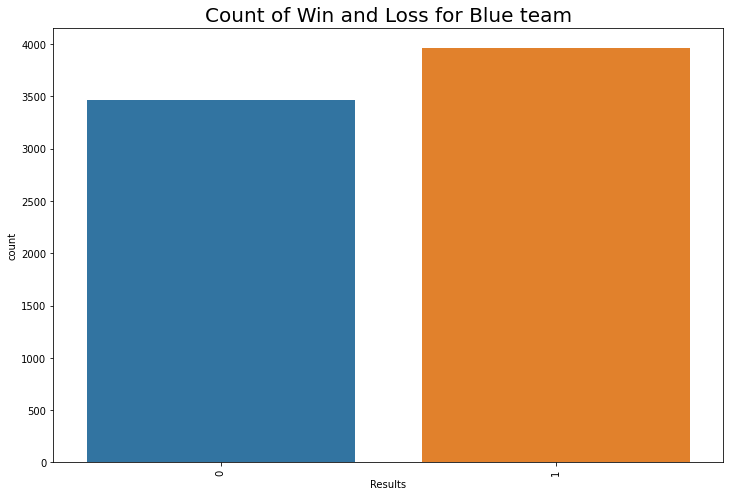

In [122]:
plt.figure(figsize=(12,8))
sns.countplot(df['Results'])
plt.xticks(rotation=90)
plt.title("Count of Win and Loss for Blue team",fontdict = { 'fontsize': 20})
plt.show()

1 represent blue team wins and 0 means it lost.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


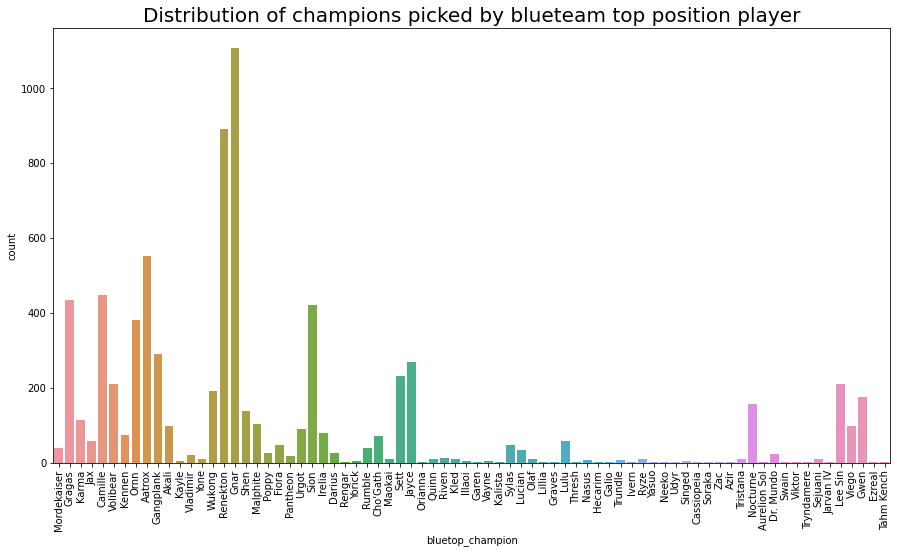

In [123]:
plt.figure(figsize=(15,8))
sns.countplot(df['bluetop_champion'])
plt.xticks(rotation=90)
plt.title("Distribution of champions picked by blueteam top position player",fontdict = { 'fontsize': 20})
plt.show()

Plot shows the distribution of champions picked by blue team top position players.
We can see "Gnar" and "Renekton" are two most picked champions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


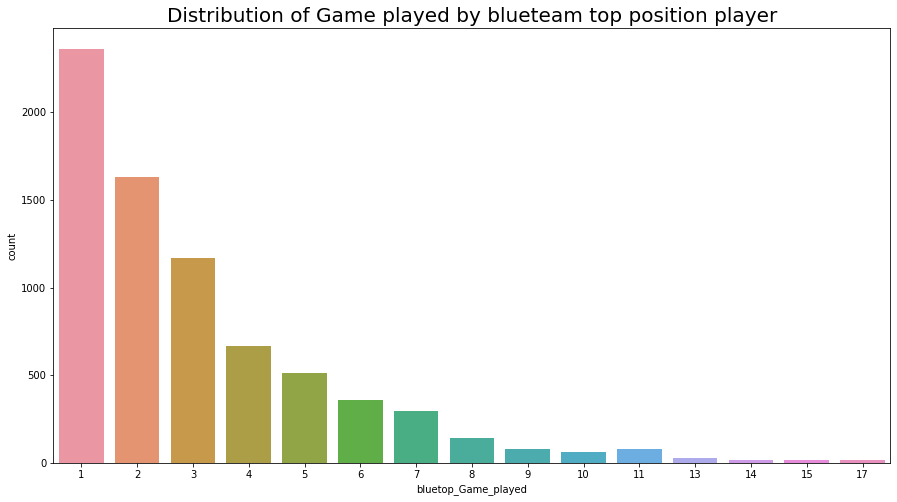

In [124]:
plt.figure(figsize=(15,8))
sns.countplot(df['bluetop_Game_played'])
plt.title("Distribution of Game played by blueteam top position player",fontdict = { 'fontsize': 20})
plt.show()

We can see from above plot,most of the players have played only one or two games in blueteam at top position.
It is also because this player may have appeared on other positions and also in other teams as well.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


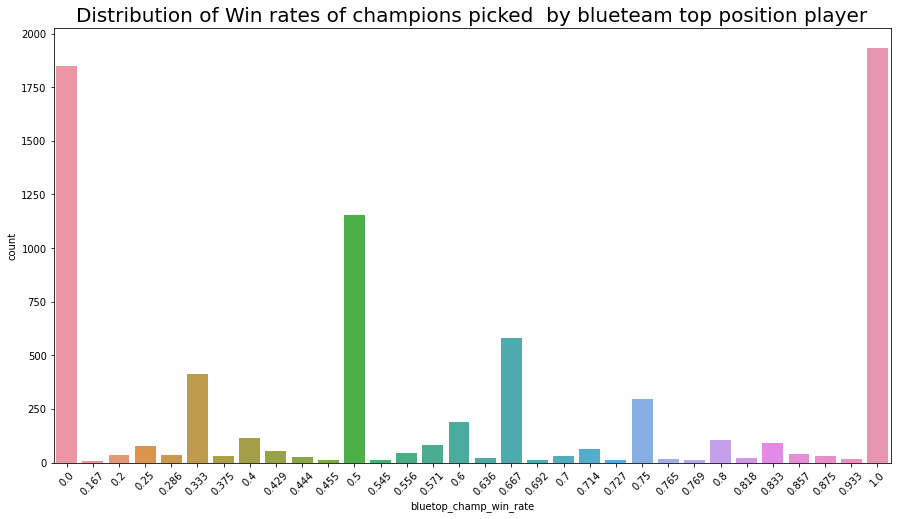

In [126]:
plt.figure(figsize=(15,8))
sns.countplot(round(df['bluetop_champ_win_rate'],3))
plt.xticks(rotation=45)
plt.title("Distribution of Win rates of champions picked  by blueteam top position player",fontdict = { 'fontsize': 20})
plt.show()

Plot indicates that most of the players are having winrate in the dataset either 0 or 1.

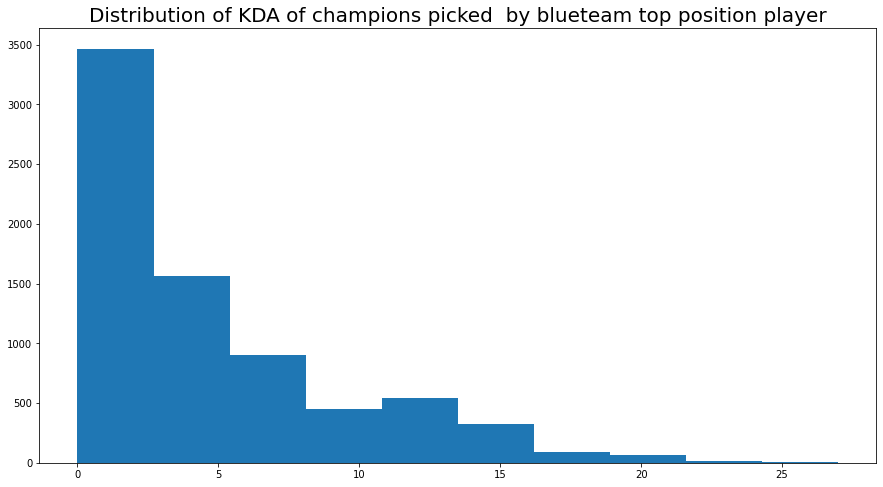

In [127]:
plt.figure(figsize=(15,8))
plt.hist(df['bluetop_KDA'])
plt.title("Distribution of KDA of champions picked  by blueteam top position player",fontdict = { 'fontsize': 20})
plt.show()

Plot shows that KDA ratio is mostly lying in between 0-5.Its a Kill-Assist to death ratio.Higher it is better it is.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


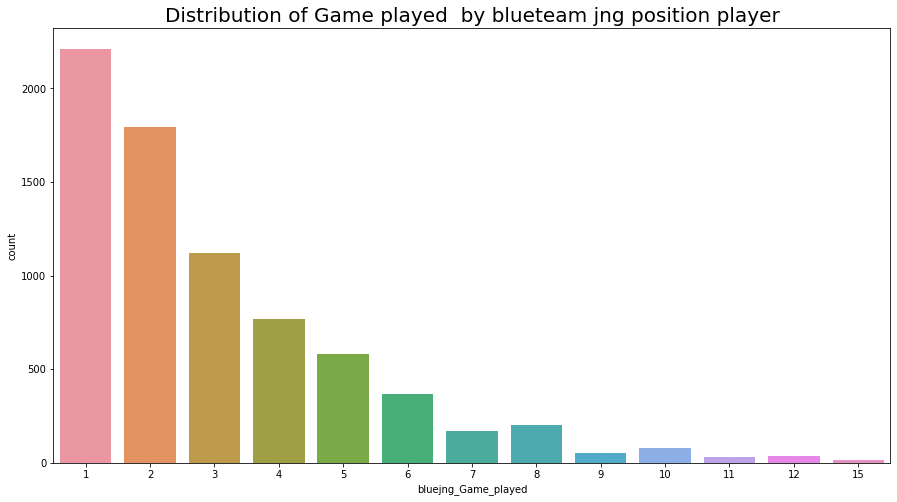

In [129]:
plt.figure(figsize=(15,8))
sns.countplot(df['bluejng_Game_played'])
plt.title("Distribution of Game played  by blueteam jng position player",fontdict = { 'fontsize': 20})
plt.show()

Above plot shows distribution of number of games played by bluejng players.

#Methodology:

#Again create spark dataframe:
Because we earlier converted spark dataframe to Pandas dataframe.

In [132]:
df = (spark
  .read                                              
  .option("inferSchema","true")                 
  .option("header","true")                           
  .csv("/content/LOL_transformed_dataset_extended_withadded_attributes.csv"))

For the purpose of using Logistic Regression only ,renaming "Result" column to "label" column.

In [251]:
df=df.withColumnRenamed("Results","label")


In [253]:
#Select label column from df dataframe
label=df.select('label')

*Data has to be structured into a specific form before it can be passed to the LogisticRegression class in Spark. Specifically every feature column needs to be condensed into a ‘DenseVector’ column which we dub ‘features’ via the ‘VectorAssembler’ transformer. Here we also split the data into a training and test data sets in the ratio of 70:30.*

In [254]:
from pyspark.ml.feature import VectorAssembler

logisticdata2=df.select(["bluetop_Game_played","bluetop_goldearned","bluetop_monsterkillsenemyjungle","bluetop_goldat10","bluejng_KDA",\
                         "Blue_team_kills","redtop_Game_played","redtop_dmg_to_cham","Red_team_kills","label"])

assembler = VectorAssembler(
    inputCols=["bluetop_Game_played","bluetop_goldearned","bluetop_monsterkillsenemyjungle","bluetop_goldat10","bluejng_KDA",\
               "Blue_team_kills","redtop_Game_played","redtop_dmg_to_cham","Red_team_kills"],
    outputCol="features")

logisticdata2 = assembler.transform(logisticdata2)

logisticdata2=logisticdata2.select("features","label")


logistictestdata, logistictrainingdata = logisticdata2.randomSplit(weights=[0.3, 0.7],  seed=12345)


#Logistic Regression Model


In [255]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(logistictrainingdata)

#Make predictions on the test set.


In [256]:
predictions = lrModel.transform(logistictestdata)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[1.0,5097.0,0.0,2...|    1|[-4.4789499642707...|       1.0|[0.01121804755547...|
|[1.0,5119.0,0.0,2...|    0|[12.7554787743072...|       0.0|[0.99999711354560...|
|[1.0,5313.0,0.0,3...|    1|[-8.1682972164484...|       1.0|[2.83419995735179...|
|[1.0,6026.0,0.0,2...|    0|[7.47892634869382...|       0.0|[0.99943545533409...|
|[1.0,6129.0,0.0,3...|    0|[6.40892191088037...|       0.0|[0.99835590854664...|
|[1.0,6171.0,0.0,2...|    0|[8.01255390405134...|       0.0|[0.99966883212196...|
|[1.0,6398.0,0.0,2...|    0|[6.25946538661352...|       0.0|[0.99809138194154...|
|[1.0,6550.0,0.0,2...|    0|[9.34801379401164...|       0.0|[0.99991286927044...|
|[1.0,6571.0,0.0,2...|    0|[7.31286733530334...|       0.0|[0.99933354238588...|
|[1.0,6664.0,0.0

We can obtain the coefficients by using LogisticRegressionModel’s attributes.


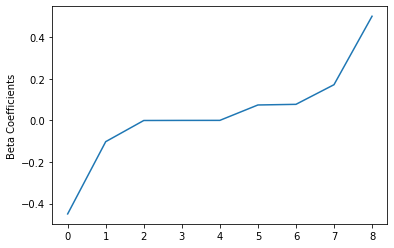

In [257]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()


#Summarize the model over the training set, we can also obtain the receiver-operating characteristic and areaUnderROC.

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


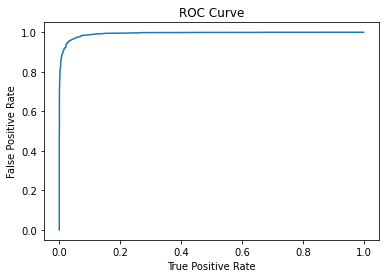

Training set areaUnderROC: 0.9935623897269336


In [258]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

#Precision and recall.


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


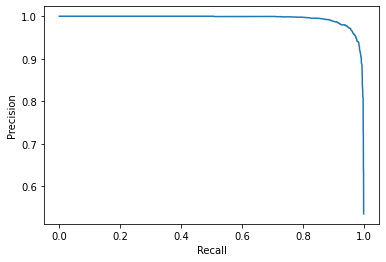

In [259]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

#Evaluate our Logistic Regression model.


In [260]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9954355215097405


#Decision Tree Classifier


In [261]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(logistictrainingdata)
predictions = dtModel.transform(logistictestdata)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+-------------+----------+--------------------+
|            features|label|rawPrediction|prediction|         probability|
+--------------------+-----+-------------+----------+--------------------+
|[1.0,5097.0,0.0,2...|    1|[50.0,2213.0]|       1.0|[0.02209456473707...|
|[1.0,5119.0,0.0,2...|    0|[1841.0,67.0]|       0.0|[0.96488469601677...|
|[1.0,5313.0,0.0,3...|    1|[50.0,2213.0]|       1.0|[0.02209456473707...|
|[1.0,6026.0,0.0,2...|    0|[1841.0,67.0]|       0.0|[0.96488469601677...|
|[1.0,6129.0,0.0,3...|    0|[1841.0,67.0]|       0.0|[0.96488469601677...|
|[1.0,6171.0,0.0,2...|    0|[1841.0,67.0]|       0.0|[0.96488469601677...|
|[1.0,6398.0,0.0,2...|    0| [218.0,43.0]|       0.0|[0.83524904214559...|
|[1.0,6550.0,0.0,2...|    0|[1841.0,67.0]|       0.0|[0.96488469601677...|
|[1.0,6571.0,0.0,2...|    0|[1841.0,67.0]|       0.0|[0.96488469601677...|
|[1.0,6664.0,0.0,2...|    0|[1841.0,67.0]|       0.0|[0.96488469601677...|
+--------------------+---

#Evaluate our Decision Tree model.


In [262]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9421798904220777


#Random Forest Classifier


In [263]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(logistictrainingdata)
predictions = rfModel.transform(logistictestdata)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[1.0,5097.0,0.0,2...|    1|[0.83732840277566...|       1.0|[0.04186642013878...|
|[1.0,5119.0,0.0,2...|    0|[19.6705842450666...|       0.0|[0.98352921225333...|
|[1.0,5313.0,0.0,3...|    1|[0.37076741804636...|       1.0|[0.01853837090231...|
|[1.0,6026.0,0.0,2...|    0|[19.6705842450666...|       0.0|[0.98352921225333...|
|[1.0,6129.0,0.0,3...|    0|[19.6705842450666...|       0.0|[0.98352921225333...|
|[1.0,6171.0,0.0,2...|    0|[19.6705842450666...|       0.0|[0.98352921225333...|
|[1.0,6398.0,0.0,2...|    0|[19.0103247102527...|       0.0|[0.95051623551263...|
|[1.0,6550.0,0.0,2...|    0|[19.6705842450666...|       0.0|[0.98352921225333...|
|[1.0,6571.0,0.0,2...|    0|[19.6510158959395...|       0.0|[0.98255079479697...|
|[1.0,6664.0,0.0

#Evaluate our Random Forest Classifier.


In [264]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9917761600378793


#Gradient-Boosted Tree Classifier


In [265]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(logistictrainingdata)
predictions = gbtModel.transform(logistictestdata)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[1.0,5097.0,0.0,2...|    1|[-1.3232164671646...|       1.0|[0.06620920431823...|
|[1.0,5119.0,0.0,2...|    0|[1.32824318736158...|       0.0|[0.93440965102292...|
|[1.0,5313.0,0.0,3...|    1|[-1.3232164671646...|       1.0|[0.06620920431823...|
|[1.0,6026.0,0.0,2...|    0|[1.32824318736158...|       0.0|[0.93440965102292...|
|[1.0,6129.0,0.0,3...|    0|[1.32263711258508...|       0.0|[0.93371912183790...|
|[1.0,6171.0,0.0,2...|    0|[1.32824318736158...|       0.0|[0.93440965102292...|
|[1.0,6398.0,0.0,2...|    0|[1.25722672019883...|       0.0|[0.92514886881628...|
|[1.0,6550.0,0.0,2...|    0|[1.32824318736158...|       0.0|[0.93440965102292...|
|[1.0,6571.0,0.0,2...|    0|[1.32477287755609...|       0.0|[0.93398298785019...|
|[1.0,6664.0,0.0

#Evaluate our Gradient-Boosted Tree Classifier.


In [266]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9914121685606057


#Conclusion:

1.Overall from the results obtained above our model on the basis of few variables taken is preforming very well,as Accuracy,Precision,Recall and Area under ROC everything is very high.\
2.Out of all the models tried out ,only Decision tree performed worst having least accuracy,as in our data there is lot of variation in data,and decision tree have high variance,so this is expected.\
3.So our model can be used for prematch winner prediction for Game League of Legends,for analysis of team composition for winning a match as winning a match is important for every player participating in the game.